# REACHOUT Network Analysis

## Imports

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

import networkx as nx

## Loading data

In [2]:
df = pd.read_csv('2022-03-16_room_nogrp.csv')
df

,usernames.0,usernames.1,msgs,Type
0,agent,PJ,1,TESTER
1,agent,NaN,1,TESTER
2,AleaM,Patcalfe,140,Peer Supporter
3,AleaM,ksafari,106,Peer Supporter
4,AleaM,kylie,39,Peer Supporter
...,...,...,...,...
416,yipannie,Holly,2,Research Team
417,yourlocaldiabetic,tangts,45,Peer Supporter
418,yourlocaldiabetic,laurenmoore13,4,Peer Supporter
419,yourlocaldiabetic,Wgeorge,3,Peer Supporter


In [3]:
# renaming columns for clarity

df.rename(columns={'usernames.0': 'user1', 'usernames.1': 'user2', 'msgs': 'num_msgs'}, inplace=True)
df

,user1,user2,num_msgs,Type
0,agent,PJ,1,TESTER
1,agent,NaN,1,TESTER
2,AleaM,Patcalfe,140,Peer Supporter
3,AleaM,ksafari,106,Peer Supporter
4,AleaM,kylie,39,Peer Supporter
...,...,...,...,...
416,yipannie,Holly,2,Research Team
417,yourlocaldiabetic,tangts,45,Peer Supporter
418,yourlocaldiabetic,laurenmoore13,4,Peer Supporter
419,yourlocaldiabetic,Wgeorge,3,Peer Supporter


## No clusters

In [6]:
random.seed(1234)

In [7]:
# initializing graph 

G = nx.Graph()

In [8]:
# adding nodes based on user type

for user in set(df['user1']).union(set(df['user2'])):
    user_type = None
    if user in df['user1'].values:
        user_type = df[df['user1'] == user]['Type'].values[0]
    elif user in df['user2'].values:
        user_type = df[df['user2'] == user]['Type'].values[0]
    G.add_node(user, user_type=user_type)

In [9]:
# adding edges; edge weights based on num_msgs

for _, row in df.iterrows():
    G.add_edge(row['user1'], row['user2'], weight=row['num_msgs'])

In [10]:
# drawing graph
pos = nx.spring_layout(G)

# getting edge weights
weights = [G[u][v]['weight'] for u, v in G.edges()]
max_weight = max(weights) if weights else 1
normalized = [5 * (w / max_weight) for w in weights]  # normalize for better visibility

# getting node colors based on user type
user_types = nx.get_node_attributes(G, 'user_type')
types = list(set(user_types.values()))
color_map = {ut: plt.cm.tab20(i / len(types)) for i, ut in enumerate(types)}
node_colors = [color_map[user_types[node]] for node in G.nodes()]

c:\Users\Sadie\miniconda3\Lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


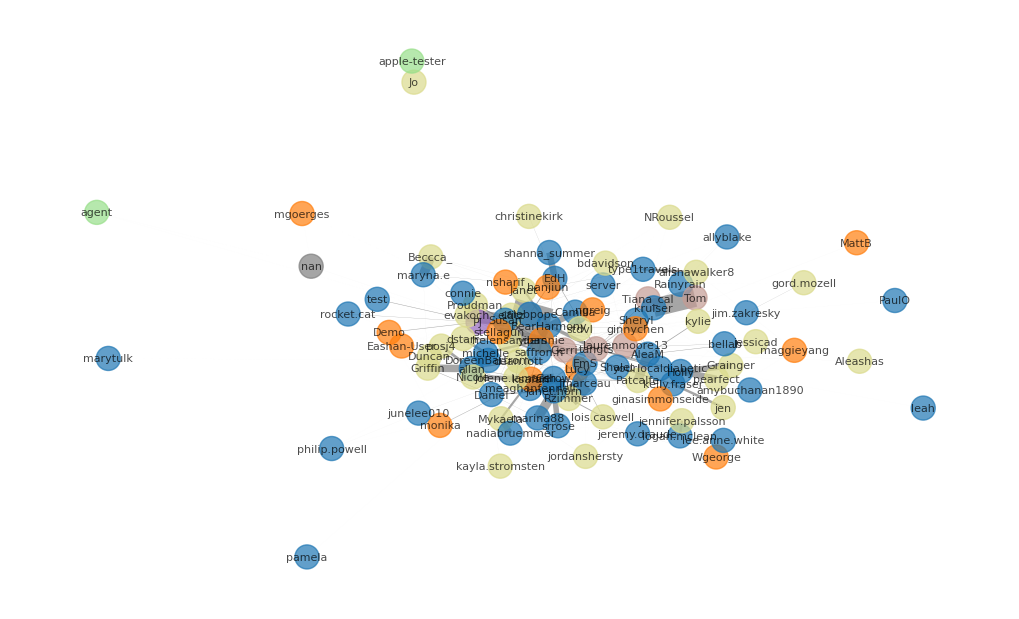

In [11]:
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, width=np.power(normalized, 2), edge_color='grey',
        font_color='black', node_color=node_colors, cmap=plt.cm.Spectral, alpha=0.7, font_size=8)

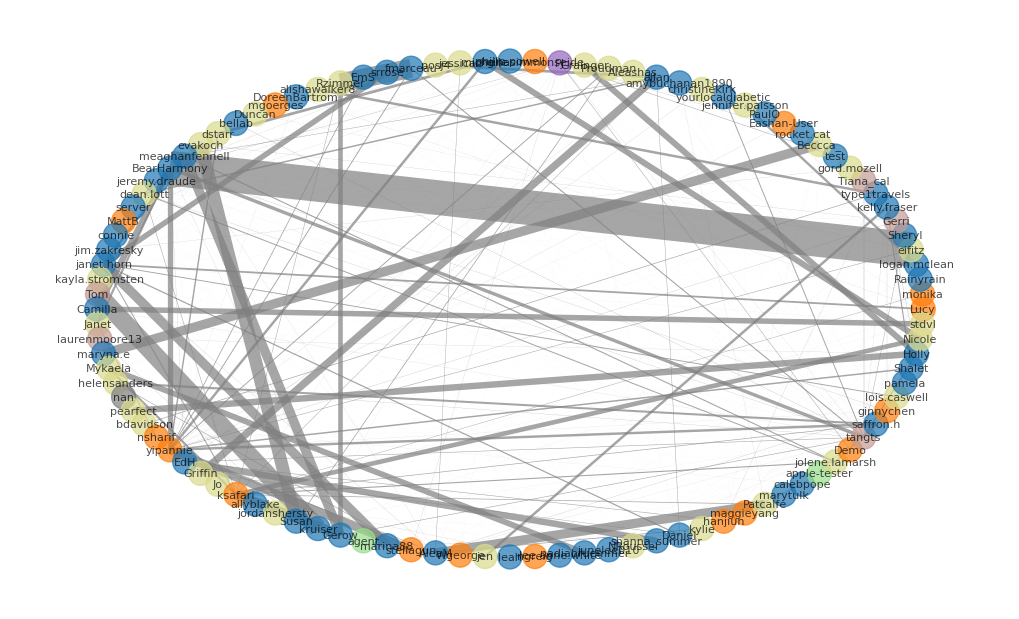

In [12]:
plt.figure(figsize=(10, 6))
nx.draw(G, pos=nx.circular_layout(G), with_labels=True, width=np.power(normalized, 2), edge_color='grey',
        font_color='black', node_color=node_colors, cmap=plt.cm.Spectral, alpha=0.7, font_size=8)

## Creating clusters by user type

In [13]:
df = pd.read_csv('2022-03-16_room_nogrp.csv')
df

,usernames.0,usernames.1,msgs,Type
0,agent,PJ,1,TESTER
1,agent,NaN,1,TESTER
2,AleaM,Patcalfe,140,Peer Supporter
3,AleaM,ksafari,106,Peer Supporter
4,AleaM,kylie,39,Peer Supporter
...,...,...,...,...
416,yipannie,Holly,2,Research Team
417,yourlocaldiabetic,tangts,45,Peer Supporter
418,yourlocaldiabetic,laurenmoore13,4,Peer Supporter
419,yourlocaldiabetic,Wgeorge,3,Peer Supporter


In [14]:
df.rename(columns={'usernames.0': 'user1', 'usernames.1': 'user2', 'msgs': 'num_msgs'}, inplace=True)
df

,user1,user2,num_msgs,Type
0,agent,PJ,1,TESTER
1,agent,NaN,1,TESTER
2,AleaM,Patcalfe,140,Peer Supporter
3,AleaM,ksafari,106,Peer Supporter
4,AleaM,kylie,39,Peer Supporter
...,...,...,...,...
416,yipannie,Holly,2,Research Team
417,yourlocaldiabetic,tangts,45,Peer Supporter
418,yourlocaldiabetic,laurenmoore13,4,Peer Supporter
419,yourlocaldiabetic,Wgeorge,3,Peer Supporter


In [15]:
df['num_msgs'] = pd.to_numeric(df['num_msgs'], errors='coerce')
df

,user1,user2,num_msgs,Type
0,agent,PJ,1,TESTER
1,agent,NaN,1,TESTER
2,AleaM,Patcalfe,140,Peer Supporter
3,AleaM,ksafari,106,Peer Supporter
4,AleaM,kylie,39,Peer Supporter
...,...,...,...,...
416,yipannie,Holly,2,Research Team
417,yourlocaldiabetic,tangts,45,Peer Supporter
418,yourlocaldiabetic,laurenmoore13,4,Peer Supporter
419,yourlocaldiabetic,Wgeorge,3,Peer Supporter


In [16]:
G2 = nx.Graph()

In [17]:
# nodes
for user in set(df['user1']).union(set(df['user2'])):
    user_type = None
    if user in df['user1'].values:
        user_type = df[df['user1'] == user]['Type'].values[0]
    elif user in df['user2'].values:
        user_type = df[df['user2'] == user]['Type'].values[0]
    G2.add_node(user, user_type=user_type)

In [18]:
# edges
for _, row in df.iterrows():
    G2.add_edge(row['user1'], row['user2'], weight=row['num_msgs'])

In [19]:
# setting user types for coloring
user_types = nx.get_node_attributes(G2, 'user_type')
types = list(set(user_types.values()))

# create color map
color_map = {ut: plt.cm.tab10(i / len(types)) for i, ut in enumerate(types)}
node_colors = [color_map[user_types[node]] for node in G2.nodes()]

In [20]:
# edge weights
weights = [G2[u][v]['weight'] for u, v in G2.edges()]
max_weight = max(weights) if weights else 1
normalized = [5 * (w / max_weight) for w in weights]

In [37]:
# manually creating positions for each cluster
pos = {}
radius = 5 
distance = 15

for i, user_type in enumerate(types):
    nodes = [node for node, typ in user_types.items() if typ == user_type]
    num_nodes = len(nodes)
    angle_offset = 4 * np.pi * i / len(types)
    cluster_center_x = distance * np.cos(angle_offset)
    cluster_center_y = distance * np.sin(angle_offset)
    
    for j, node in enumerate(nodes):
        angle = 2 * np.pi * j / num_nodes
        x = cluster_center_x + radius * np.cos(angle)
        y = cluster_center_y + radius * np.sin(angle)
        pos[node] = (x, y)

'''
for i, user_type in enumerate(types):
    nodes = [node for node, typ in user_types.items() if typ == user_type]
    num_nodes = len(nodes)
    angle_offset = 2 * np.pi / len(types) * i
    for j, node in enumerate(nodes):
        angle = 2 * np.pi * j / num_nodes
        x, y = radius * np.cos(angle + angle_offset), radius * np.sin(angle + angle_offset)
        pos[node] = (x, y)
'''

'\nfor i, user_type in enumerate(types):\n    nodes = [node for node, typ in user_types.items() if typ == user_type]\n    num_nodes = len(nodes)\n    angle_offset = 2 * np.pi / len(types) * i\n    for j, node in enumerate(nodes):\n        angle = 2 * np.pi * j / num_nodes\n        x, y = radius * np.cos(angle + angle_offset), radius * np.sin(angle + angle_offset)\n        pos[node] = (x, y)\n'

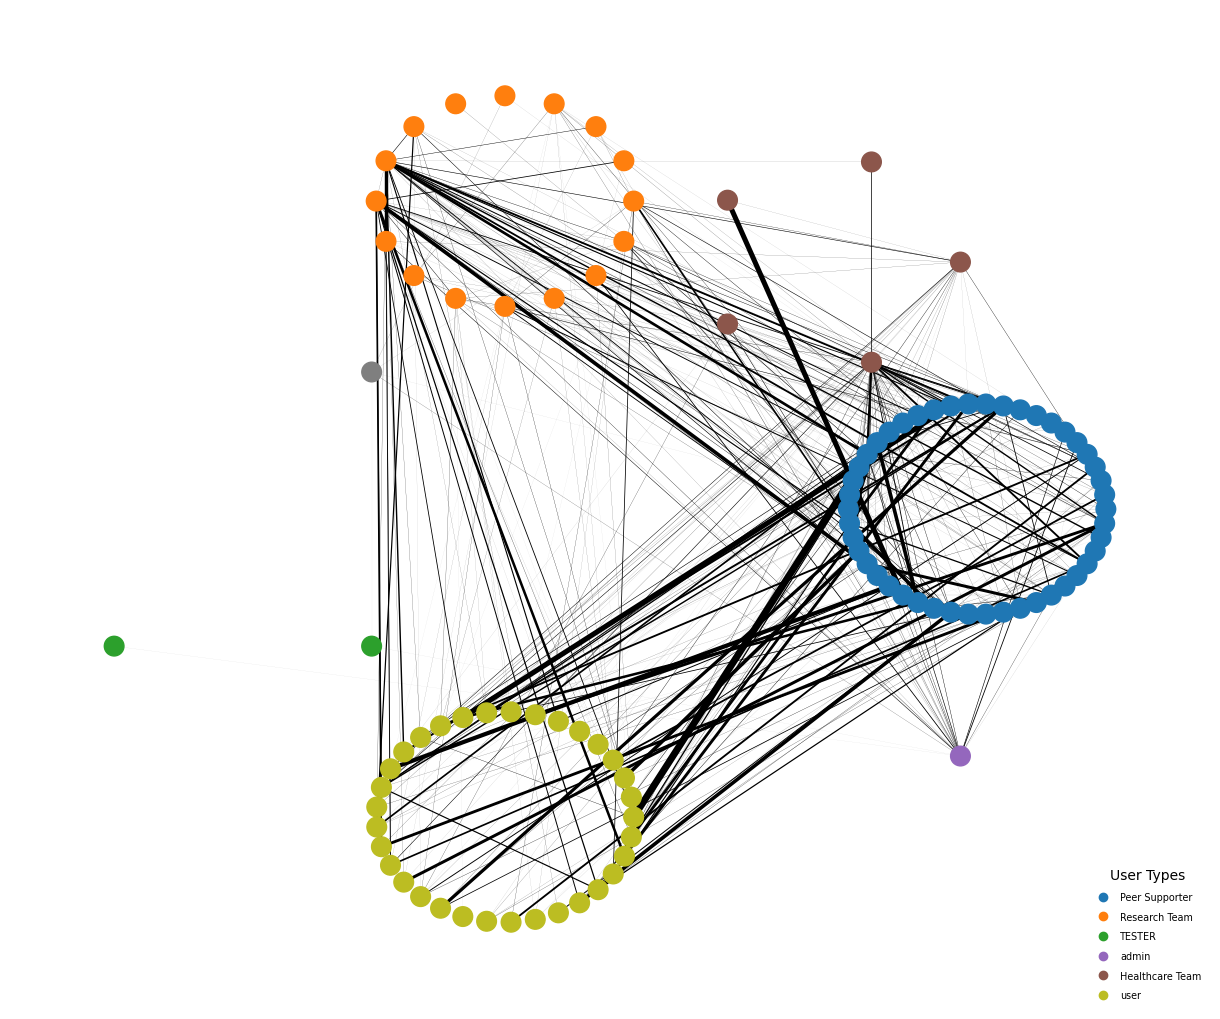

In [40]:
#nx.draw_networkx_nodes(G2, pos=pos, node_color=node_colors, node_size=100)
#nx.draw_networkx_edges(G2, pos=pos, width=normalized, edge_color='black')

plt.figure(figsize=(12, 10))
nx.draw(G, pos=pos, with_labels=False, node_color=node_colors, node_size=200, width=normalized, edge_color='black')

for user_type, color in color_map.items():
    plt.plot([], [], color=color, label=user_type, marker='o', linestyle='None')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='User Types', loc='lower right', fontsize='x-small')
plt.show()